# Intro to CNN and Computer Vision with TensorFlow

**Computer Vision** is the practice of writing algorithms which can discover patterns in visual data, such as comaera of a self-driving car recognizing the car in front

### Get the data

The dataset used come from [Food 101](https://www.kaggle.com/datasets/dansbecker/food-101) dataset, its contains images of 101 types of food. However, we modified it to only use two classes (pizza and steak) using [this notebook](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb)


In [2]:
# Download dataset
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--22:35:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
           => `pizza_steak.zip'
Resolving storage.googleapis.com... done.
Connecting to storage.googleapis.com[142.250.178.176]:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109,540,975 [application/zip]

    0K .......... .......... .......... .......... ..........  0%  189.39 KB/s
   50K .......... .......... .......... .......... ..........  0%  289.02 KB/s
  100K .......... .......... .......... .......... ..........  0%  268.82 KB/s
  150K .......... .......... .......... .......... ..........  0%  581.40 KB/s
  200K .......... .......... .......... .......... ..........  0%  625.00 KB/s
  250K .......... .......... .......... .......... ..........  0%    1.81 MB/s
  300K .......... .......... .......... .......... ..........  0%    1.36 MB/s
  350K .......... .......... .......... .......... ..........  0%  549.45 KB/s
  400K .......... .......... .......... .........

In [3]:
import zipfile

# Unzip downloaded dataset
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

### Inspect the data

In [1]:
dataset_folder = "./pizza_steak"
dataset_folder

'./pizza_steak'

In [2]:
import os

# Walk through dataset directory and list number of files
for dir_path, dir_names, file_names in os.walk(dataset_folder):
    print(f"There are {len(dir_names)} directories and {len(file_names)} images in '{dir_path}'.")

There are 2 directories and 0 images in './pizza_steak'.
There are 2 directories and 0 images in './pizza_steak\test'.
There are 0 directories and 250 images in './pizza_steak\test\pizza'.
There are 0 directories and 250 images in './pizza_steak\test\steak'.
There are 2 directories and 0 images in './pizza_steak\train'.
There are 0 directories and 750 images in './pizza_steak\train\pizza'.
There are 0 directories and 750 images in './pizza_steak\train\steak'.


In [3]:
import pathlib
import numpy as np

# Get classnames programmatically
data_dir = pathlib.Path(f"{dataset_folder}/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))  # Retrieve class names from sub-directories
class_names

array(['pizza', 'steak'], dtype='<U5')

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Visualize images
def view_random_image(target_dir:str, target_class:str):
    # Setup directory from which we will view images
    target_folder = os.path.join(target_dir, target_class)
    
    # Get one random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # Read image
    image = mpimg.imread(os.path.join(target_folder, random_image[0]))
    plt.imshow(image)
    plt.title(target_class)
    plt.axis("off");
    
    print(f"Image shape: {image.shape}")
    
    return image

Image shape: (512, 512, 3)


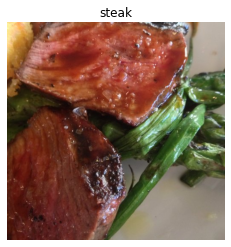

In [5]:
# View a random image from the training dataset
img = view_random_image(target_dir=os.path.join(dataset_folder, "train"), target_class="steak")

Image shape: (512, 308, 3)


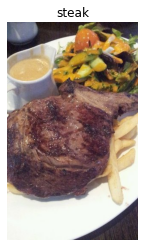

In [6]:
# View a random image from the training dataset
img = view_random_image(target_dir=os.path.join(dataset_folder, "train"), target_class="steak")

Image shape: (512, 512, 3)


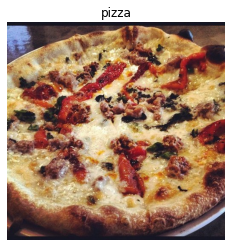

In [7]:
# View a random image from the training dataset
img = view_random_image(target_dir=os.path.join(dataset_folder, "train"), target_class="pizza")

In [8]:
# Looking at the pixels of an image
img

array([[[27, 21, 31],
        [27, 21, 31],
        [27, 21, 31],
        ...,
        [19, 23, 34],
        [18, 25, 33],
        [18, 25, 33]],

       [[24, 22, 33],
        [24, 22, 33],
        [24, 22, 33],
        ...,
        [22, 25, 34],
        [22, 25, 32],
        [21, 26, 32]],

       [[18, 21, 36],
        [18, 21, 36],
        [18, 21, 36],
        ...,
        [21, 20, 25],
        [20, 19, 24],
        [20, 19, 24]],

       ...,

       [[25, 22, 33],
        [25, 22, 33],
        [24, 22, 33],
        ...,
        [23, 22, 36],
        [23, 22, 36],
        [23, 22, 36]],

       [[23, 20, 31],
        [23, 20, 31],
        [22, 20, 31],
        ...,
        [22, 21, 35],
        [22, 21, 35],
        [22, 21, 35]],

       [[24, 21, 32],
        [24, 21, 32],
        [23, 21, 32],
        ...,
        [23, 22, 36],
        [23, 22, 36],
        [23, 22, 36]]], dtype=uint8)

Pixels are between 0 and 255. Let's normalize them (put them between 0 and 1)

In [9]:
# Normalizing image pixels
img/255.

array([[[0.10588235, 0.08235294, 0.12156863],
        [0.10588235, 0.08235294, 0.12156863],
        [0.10588235, 0.08235294, 0.12156863],
        ...,
        [0.0745098 , 0.09019608, 0.13333333],
        [0.07058824, 0.09803922, 0.12941176],
        [0.07058824, 0.09803922, 0.12941176]],

       [[0.09411765, 0.08627451, 0.12941176],
        [0.09411765, 0.08627451, 0.12941176],
        [0.09411765, 0.08627451, 0.12941176],
        ...,
        [0.08627451, 0.09803922, 0.13333333],
        [0.08627451, 0.09803922, 0.1254902 ],
        [0.08235294, 0.10196078, 0.1254902 ]],

       [[0.07058824, 0.08235294, 0.14117647],
        [0.07058824, 0.08235294, 0.14117647],
        [0.07058824, 0.08235294, 0.14117647],
        ...,
        [0.08235294, 0.07843137, 0.09803922],
        [0.07843137, 0.0745098 , 0.09411765],
        [0.07843137, 0.0745098 , 0.09411765]],

       ...,

       [[0.09803922, 0.08627451, 0.12941176],
        [0.09803922, 0.08627451, 0.12941176],
        [0.09411765, 0

### An end-to-end example

* Load images
* Preprocess iimages
* Build a CNN
* Compile CNN
* Fit CNN to the data training data

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pandas as pd

In [16]:
# set random seed
tf.random.set_seed(42)

# preprocessing data (get all pixel values between 0 and 1, also called normalization/rescaling)
train_data__gen = ImageDataGenerator(rescale=1./255) # divided by 255 because it is the mex value a pixel can have
test_data__gen = ImageDataGenerator(rescale=1./255)

# setup path to directories
train_dir = os.path.join(dataset_folder, "train")
test_dir = os.path.join(dataset_folder, "test")

# Import data from directories and turn it into batches
batch_size=32
reshape_image_to = (224, 224)
train_data = train_data__gen.flow_from_directory(train_dir, 
                                                 batch_size=batch_size, 
                                                 target_size=reshape_image_to, # dimensions to which all images will be resized to
                                                 class_mode="binary", # we are working with 2 classes
                                                 shuffle=True,
                                                 seed=42, # for reproducibily
                                                ) # takes path to a folder and generates batches of augmented data (as tuples of (input,label))

test_data = test_data__gen.flow_from_directory(test_dir,
                                              batch_size=batch_size,
                                              target_size=reshape_image_to,
                                              class_mode="binary",
                                              shuffle=False,
                                              seed=42
                                             )

img_width=224
img_height=224
channel = 3

# Build a CNN model (same as a Tiny VGG, on CNN explainer website: https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
    # =============== Backbone ================
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(img_width, img_height, channel),
                           padding="same",
                           strides=1
                          ),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2),padding="valid"),
    
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    # ================== Head =================
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, # because it is a binary classification
                          activation="sigmoid", # because it is a binary classification
                         )
])


# Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),  # because it is a binary classification
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"] # because it is a classification
               )

# Fit the model
history_1 = model_1.fit(train_data, epochs=5, 
                       steps_per_epoch=len(train_data),# Total number of steps (batches of samples) before 
                                                      # declaring one epoch finished and starting the next epoch
                        validation_data=test_data,
                        validation_steps=len(test_data)
                       )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 55s 1s/step - loss: 0.5743 - accuracy: 0.6987 - val_loss: 0.4878 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 37s 791ms/step - loss: 0.4386 - accuracy: 0.8040 - val_loss: 0.3499 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 42s 881ms/step - loss: 0.4115 - accuracy: 0.8127 - val_loss: 0.4329 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 38s 797ms/step - loss: 0.3639 - accuracy: 0.8447 - val_loss: 0.3191 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 38s 812ms/step - loss: 0.3107 - accuracy: 0.8687 - val_loss: 0.3432 - val_accuracy: 0.8260


In [18]:
history_1.history

{'loss': [0.5742568969726562,
  0.43858423829078674,
  0.4114968180656433,
  0.3639216423034668,
  0.3107147216796875],
 'accuracy': [0.6986666917800903,
  0.8040000200271606,
  0.812666654586792,
  0.8446666598320007,
  0.8686666488647461],
 'val_loss': [0.4877997934818268,
  0.3498637080192566,
  0.43288329243659973,
  0.3191031217575073,
  0.3431577980518341],
 'val_accuracy': [0.7580000162124634,
  0.8560000061988831,
  0.8019999861717224,
  0.8640000224113464,
  0.8259999752044678]}

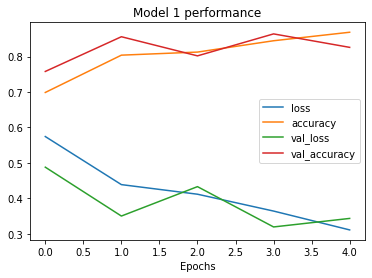

In [22]:
# Model 1 performance plot
history_df1 = pd.DataFrame(history_1.history)
history_df1.plot()

plt.xlabel("Epochs")
plt.title("Model 1 performance");

In [23]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 222, 222, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 107, 107, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  